In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Pooja/Desktop/ToyotaCorolla.csv")

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
data=pd.DataFrame({'Price':df['Price'], 'Age':df['Age_08_04'], 'KM':df['KM'],'HP':df['HP'], 'cc':df['cc'], 'Doors':df['Doors'], 'Gears':df['Gears'], 'QTax':df['Quarterly_Tax'], 'Weight':df['Weight']})
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [8]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
data.drop_duplicates(inplace = True)
data = data.reset_index()
data

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data = data.drop('index',axis=1)
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


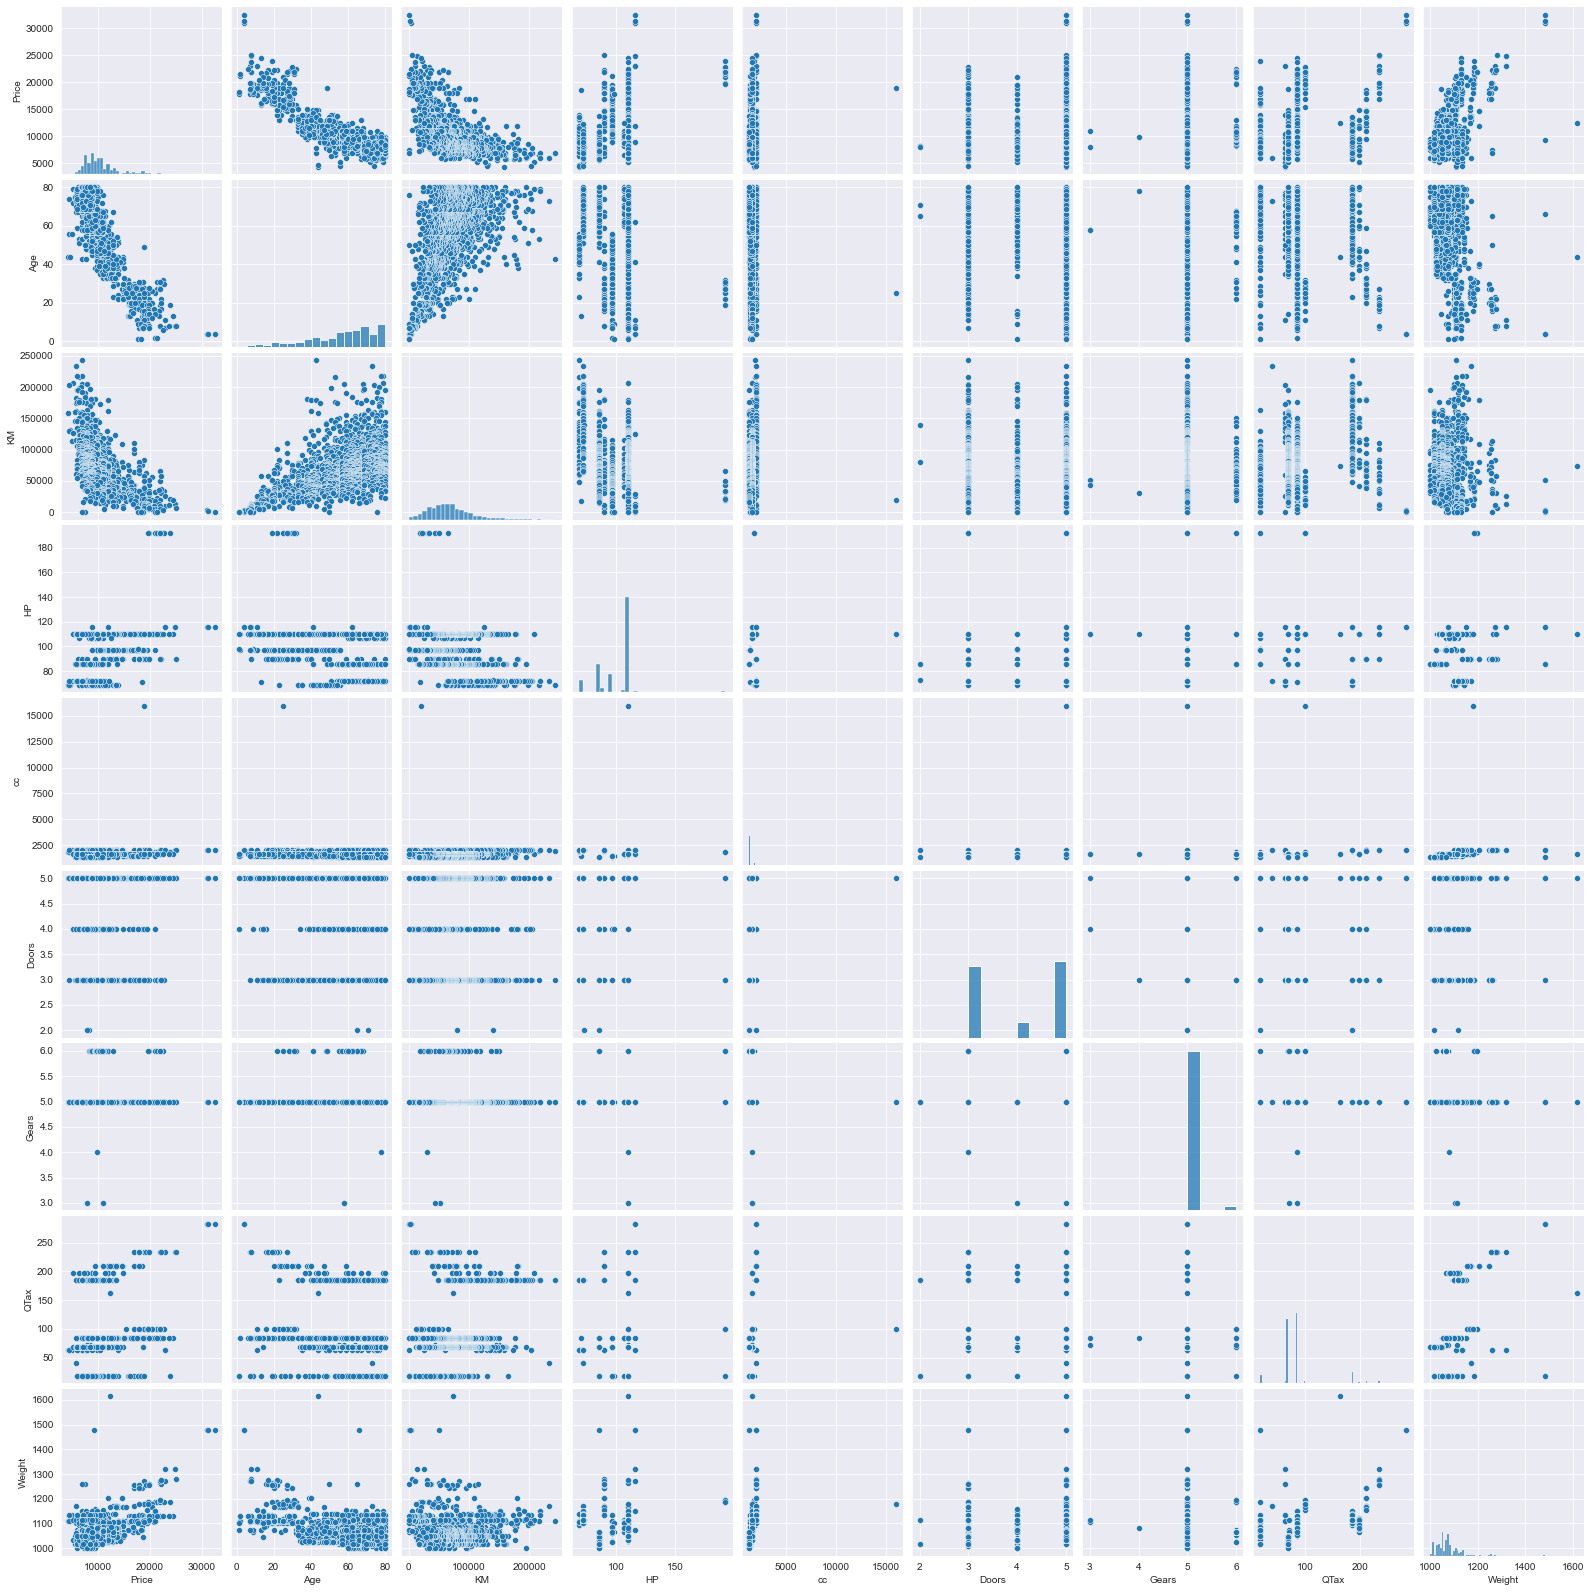

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [12]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [ ]:
# removing gears column as it has very less correlation with Price

In [13]:
data = data.drop('Gears',axis = 1)

In [14]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+QTax+Weight',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:31:19   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
cc            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
QTax           4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.pvalues

Intercept     1.313394e-02
Age          6.480986e-288
KM            4.646226e-55
HP            5.622551e-33
cc            1.745423e-01
Doors         5.425721e-01
QTax          2.158809e-03
Weight        1.297391e-51
dtype: float64

In [ ]:
# p-value is less than 0.5 in doors and cc

In [19]:
model = smf.ols("Price~cc", data = data).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           2.29e-06
Time:                        11:16:31   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model = smf.ols("Price~Doors", data = data).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           2.40e-12
Time:                        11:16:00   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# rsqaured value is very low in cc ,so we drop the cc

In [21]:
data = data.drop("cc",axis = 1)
data

,Price,Age,KM,HP,Doors,QTax,Weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,69,1025
1431,10845,72,19000,86,3,69,1015
1432,8500,71,17016,86,3,69,1015
1433,7250,70,16916,86,3,69,1015


In [22]:
model= smf.ols('Price~Age+KM+HP+Doors+QTax+Weight',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1480.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:19:44   Log-Likelihood:                -12372.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2518.7574   1058.453     -2.380      0.017   -4595.046    -442.468
Age         -121.8917      2.622    -46.483      0.000    -127.036    -116.748
KM            -0.0206      0.001    -16.455      0.000      -0.023      -0.018
HP            33.3055      2.731     12.194      0.000      27.947      38.663
Doors        -23.2523     39.380     -0.590      0.555    -100.502      53.997
QTax           3.8184      1.304      2.929      0.003       1.261       6.376
Weight        16.6515      1.059     15.724      0.000      14.574      18.729
==============================================================================
Omnibus:                      145.933   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.411
Skew:                          -0.206   Prob(JB):                    2.78e-204
Kurtosis:                       6.938   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
vif1=smf.ols('Age~KM+HP+Doors+QTax+Weight',data=data).fit().rsquared
vif_age=1/(1-vif1)
vif_age

1.8754157698689944

In [24]:
vif2=smf.ols('KM~Age+HP+Doors+QTax+Weight',data=data).fit().rsquared
vif_km=1/(1-vif2)
vif_km

1.7389173124604935

In [25]:
vif3=smf.ols('HP~Age+KM+Doors+QTax+Weight',data=data).fit().rsquared
vif_hp=1/(1-vif3)
vif_hp


1.325245856832753

In [26]:
vif4=smf.ols('Doors~Age+KM+HP+QTax+Weight',data=data).fit().rsquared
vif_doors=1/(1-vif4)
vif_doors

1.1139391313630986

In [27]:
vif5=smf.ols('QTax~Age+KM+HP+Doors+Weight',data=data).fit().rsquared
vif_QTax=1/(1-vif5)
vif_QTax

2.2569972489855985

In [28]:
vif6=smf.ols('Weight~Age+KM+HP+Doors+QTax',data=data).fit().rsquared
vif_Weight=1/(1-vif6)
vif_Weight

2.423422626616171

In [29]:

d1={"variables":['Age','HP','KM','Doors','QTax','Weight'],"vif":[1.87,1.73,1.32,1.11,2.25,2.42]}


viftable=pd.DataFrame(d1)
viftable

,variables,vif
0,Age,1.87
1,HP,1.73
2,KM,1.32
3,Doors,1.11
4,QTax,2.25
5,Weight,2.42


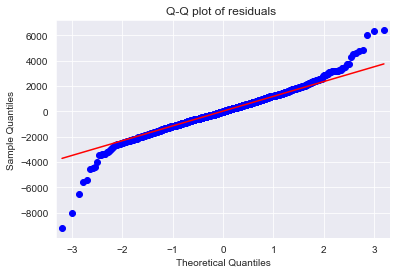

In [30]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals ")
plt.show()

<AxesSubplot:>

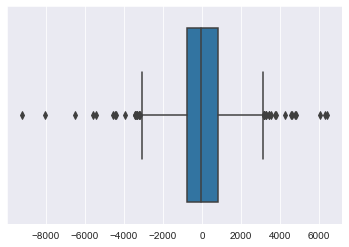

In [31]:
sns.boxplot(model.resid)

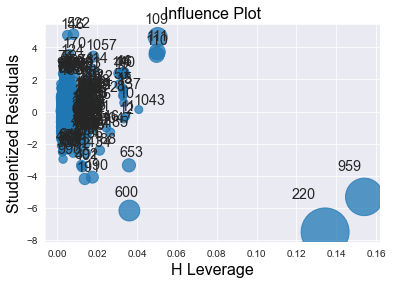

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
data=data.drop(data.index[220],axis=0).reset_index()

data.iloc[215:225,:]

,index,Price,Age,KM,HP,Doors,QTax,Weight
215,215,13500,33,75699,69,3,185,1105
216,216,10950,41,75697,97,3,69,1025
217,217,10950,44,74846,97,3,69,1025
218,218,12950,38,74319,110,5,85,1075
219,219,11950,43,74285,110,5,85,1075
220,221,11950,40,73042,110,5,85,1075
221,222,14950,44,71793,110,4,197,1067
222,223,12450,35,71200,110,5,85,1075
223,224,12950,38,67805,110,5,85,1075
224,225,11950,35,65988,110,3,69,1040


In [34]:
model2 = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1546.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:25:51   Log-Likelihood:                -12336.
No. Observations:                1434   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.472e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5450.5835   1109.915     -4.911      0.000   -7627.823   -3273.344
Age         -119.1731      2.599    -45.861      0.000    -124.271    -114.076
KM            -0.0208      0.001    -16.937      0.000      -0.023      -0.018
HP            31.5845      2.690     11.741      0.000      26.308      36.861
Doors        -46.5493     38.767     -1.201      0.230    -122.595      29.497
QTax           1.9212      1.304      1.473      0.141      -0.637       4.479
Weight        19.6687      1.114     17.648      0.000      17.482      21.855
==============================================================================
Omnibus:                      131.540   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.534
Skew:                          -0.206   Prob(JB):                    3.83e-159
Kurtosis:                       6.470   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

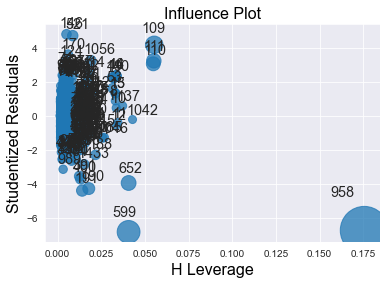

In [35]:
influence_plot(model2)
plt.show()

In [48]:
data = data.drop(data.index[958],axis = 0).reset_index()

In [50]:
data=data.drop("index",axis=1)
data.iloc[953:958,:]

,level_0,Price,Age,KM,HP,Doors,QTax,Weight
953,953,8750,58,51712,110,3,69,1050
954,954,10950,58,51421,110,5,85,1105
955,955,8950,61,51235,86,4,69,1000
956,956,8950,65,51000,86,3,69,1015
957,957,8895,61,50925,110,5,85,1070


In [51]:
model3=smf.ols("Price~Age+KM+HP+Doors+QTax+Weight",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1602.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:58:34   Log-Likelihood:                -12279.
No. Observations:                1430   AIC:                         2.457e+04
Df Residuals:                    1423   BIC:                         2.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8473.6745   1181.448     -7.172      0.000   -1.08e+04   -6156.107
Age         -116.0400      2.598    -44.657      0.000    -121.137    -110.943
KM            -0.0212      0.001    -17.493      0.000      -0.024      -0.019
HP            28.4429      2.693     10.564      0.000      23.161      33.725
Doors        -79.6537     38.593     -2.064      0.039    -155.358      -3.949
QTax          -0.8461      1.351     -0.626      0.531      -3.496       1.803
Weight        23.0048      1.206     19.082      0.000      20.640      25.370
==============================================================================
Omnibus:                      135.071   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.381
Skew:                          -0.236   Prob(JB):                    1.03e-161
Kurtosis:                       6.496   Cond. No.                     2.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# model3 has the highest rsquared values so it is the best model to consider.

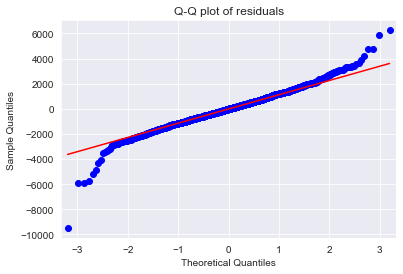

In [52]:
sm.qqplot(model3.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [53]:
Predicted=model3.fittedvalues

In [56]:
Errors=model3.resid

In [57]:

data['Predicted'] = Predicted
data['Errors'] = Errors
data

,level_0,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,0,13500,23,46986,90,3,210,1165,16806.848508,-3306.848508
1,1,13750,23,72937,90,3,210,1165,16257.658693,-2507.658693
2,2,13950,24,41711,90,3,210,1165,16802.441066,-2852.441066
3,3,14950,26,48000,90,3,210,1165,16437.269689,-1487.269689
4,4,13750,30,38500,90,3,210,1170,16289.178002,-2539.178002
...,...,...,...,...,...,...,...,...,...,...
1425,1429,7500,69,20544,86,3,69,1025,8813.446679,-1313.446679
1426,1430,10845,72,19000,86,3,69,1015,8267.953954,2577.046046
1427,1431,8500,71,17016,86,3,69,1015,8425.980482,74.019518
1428,1432,7250,70,16916,86,3,69,1015,8544.136730,-1294.136730
